## Análise de Casos Covid-19

In [5]:
!wget https://data.brasil.io/dataset/covid19/caso_full.csv.gz

--2021-08-13 13:53:59--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 104.26.9.175, 172.67.71.45, 104.26.8.175, ...
Connecting to data.brasil.io (data.brasil.io)|104.26.9.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62976594 (60M) [application/gzip]
Saving to: ‘caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]  60.06M  7.37MB/s    in 9.5s    

2021-08-13 13:54:09 (6.30 MB/s) - ‘caso_full.csv.gz’ saved [62976594/62976594]



In [6]:
!gzip -d caso_full.csv.gz



In [98]:
import pandas as pd


dataset = pd.read_csv('caso_full.csv').dropna()
dataset

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,407319.0,False,False,7,1.69320,2020-03-20,0.0000,0,4,city,AC,3,0
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,407319.0,False,False,11,2.66075,2020-03-21,0.0000,0,5,city,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578810,Tocantínia,1721109.0,2021-08-12,202132,7617.0,7545.0,False,True,860,11290.53433,2021-08-09,0.0151,13,451,city,TO,0,0
2578811,Tupirama,1721257.0,2021-08-12,202132,1922.0,1891.0,False,True,207,10770.03122,2021-08-09,0.0097,2,447,city,TO,0,0
2578812,Tupiratins,1721307.0,2021-08-12,202132,2729.0,2671.0,False,True,175,6412.60535,2021-08-09,0.0171,3,447,city,TO,0,0
2578813,Wanderlândia,1722081.0,2021-08-12,202132,11734.0,11683.0,False,True,1061,9042.09988,2021-08-09,0.0160,17,472,city,TO,0,0


In [105]:
dataset = dataset.loc[dataset['is_repeated']==False]
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')
dataset = dataset.loc[dataset['date'].dt.year==2021,:]
dataset['month'] = dataset['date'].dt.month

dataset

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,month
5777,Acrelândia,1200013.0,2021-01-01,202053,15490.0,15256.0,False,False,563,3634.60297,2021-01-01,0.0213,12,279,city,AC,0,0,1
5778,Assis Brasil,1200054.0,2021-01-01,202053,7534.0,7417.0,False,False,762,10114.14919,2021-01-01,0.0118,9,246,city,AC,0,0,1
5779,Brasiléia,1200104.0,2021-01-01,202053,26702.0,26278.0,False,False,1298,4861.05910,2021-01-01,0.0169,22,238,city,AC,0,0,1
5780,Bujari,1200138.0,2021-01-01,202053,10420.0,10266.0,False,False,491,4712.09213,2021-01-01,0.0163,8,269,city,AC,0,0,1
5781,Capixaba,1200179.0,2021-01-01,202053,12008.0,11733.0,False,False,305,2539.97335,2021-01-01,0.0262,8,239,city,AC,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578390,Tocantínia,1721109.0,2021-08-09,202132,7617.0,7545.0,True,False,860,11290.53433,2021-08-09,0.0151,13,448,city,TO,6,0,8
2578391,Tupirama,1721257.0,2021-08-09,202132,1922.0,1891.0,True,False,207,10770.03122,2021-08-09,0.0097,2,444,city,TO,0,0,8
2578392,Tupiratins,1721307.0,2021-08-09,202132,2729.0,2671.0,True,False,175,6412.60535,2021-08-09,0.0171,3,444,city,TO,0,0,8
2578393,Wanderlândia,1722081.0,2021-08-09,202132,11734.0,11683.0,True,False,1061,9042.09988,2021-08-09,0.0160,17,469,city,TO,0,0,8


## Média de Casos por 100k Habitantes

In [100]:
dataset.groupby('state').agg({
    'last_available_confirmed_per_100k_inhabitants':['mean', 'max', 'min'],
})

last_available_confirmed_per_100k_inhabitants                          
                                               mean           max         min
state                                                                        
AC                                      8017.371698   23798.77887  1240.24598
AL                                      3447.734714   12496.62085   389.41250
AM                                     10383.564197   46512.66104  1436.50576
AP                                     13680.091286   24166.35905  5518.79306
BA                                      4769.599169   18040.50409   240.78427
CE                                      6575.991788   21915.93576   434.45950
DF                                     10330.911104   13138.90092  7226.58698
ES                                      9845.981904   22838.05869  1544.46328
GO                                      6576.638198   46400.40702   381.59200
MA                                      3751.208185   30868.23981    71.37759
MG                                      4100.976832   26172.26951    28.08989
MS                                      6676.743779   20876.37741   248.83696
MT                                      8069.967078   24190.67947   281.64838
PA                                      5121.777198   33175.23057   313.14497
PB                                      5660.151493   17993.63057   487.14479
PE                                      3670.452655   15675.72113   335.23145
PI                                      5232.636052   23193.64162   296.24753
PR                                      7239.045218   31158.88312   276.05245
RJ                                      5822.739239   22600.39618   374.57192
RN                                      6259.179185   61297.31532   209.60366
RO                                      8692.381504   20763.50093   784.60090
RR                                     10146.234319   22265.11490  3452.52774
RS                                      7714.098464  904809.93018    38.82313
SC                                     10094.550541   31092.43697   330.08488
SE                                      6007.612711   22722.27611   865.55435
SP                                      6033.483131   26749.74039   168.38167
TO                                      6914.953461   21519.62288   643.22470

In [106]:
state_date = dataset.groupby(['state', dataset["date"].dt.month]).sum()
state_date

city_ibge_code  epidemiological_week  ...  new_deaths  month
state date                                        ...                   
AC    1       8.186393e+08             137831782  ...          72    682
      2       7.394161e+08             124497692  ...         131   1232
      3       8.186393e+08             137839614  ...         264   2046
      4       7.922316e+08             133396032  ...         267   2640
      5       8.186393e+08             137845554  ...         133   3410
...                    ...                   ...  ...         ...    ...
TO    4       6.899253e+09             814726260  ...         502  16124
      5       6.423443e+09             758553858  ...         318  18765
      6       5.233916e+09             618095192  ...         350  18348
      7       5.709727e+09             674299008  ...         285  23352
      8       1.903242e+09             224769950  ...          64   8896

[210 rows x 14 columns]

In [62]:
import seaborn as sns
sns.set_theme(style="darkgrid")

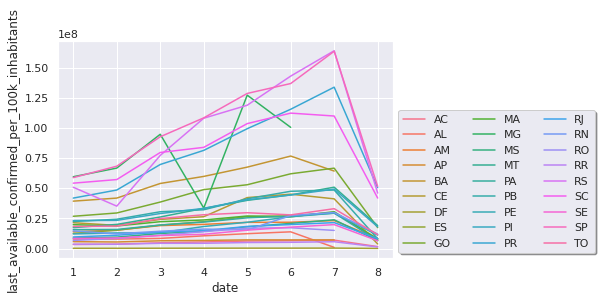

In [122]:
g = sns.lineplot(data=state_date,x='date', y='last_available_confirmed_per_100k_inhabitants', hue='state')

g.legend(loc='lower left', bbox_to_anchor=(1.0, 0),
          ncol=3, fancybox=True, shadow=True)

In [66]:
pe_dataset = dataset.loc[dataset['state']=='PE',:]

pe_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1334614,Abreu e Lima,2600054.0,2021-01-01,202053,100346.0,99990.0,False,False,1174,1169.95197,2021-01-01,0.1218,143,268,city,PE,5,0
1334615,Afogados da Ingazeira,2600104.0,2021-01-01,202053,37404.0,37259.0,False,False,1855,4959.36264,2021-01-01,0.0140,26,248,city,PE,45,0
1334616,Afrânio,2600203.0,2021-01-01,202053,19810.0,19635.0,False,False,413,2084.80565,2021-01-01,0.0145,6,248,city,PE,1,0
1334617,Agrestina,2600302.0,2021-01-01,202053,25065.0,24885.0,False,False,665,2653.10193,2021-01-01,0.0496,33,253,city,PE,0,0
1334618,Alagoinha,2600609.0,2021-01-01,202053,14718.0,14636.0,False,False,310,2106.26444,2021-01-01,0.0355,11,258,city,PE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376309,Vicência,2616308.0,2021-08-11,202132,32772.0,32643.0,True,False,772,2355.66947,2021-08-11,0.0440,34,479,city,PE,-1,-1
1376310,Vitória de Santo Antão,2616407.0,2021-08-11,202132,139583.0,138757.0,True,False,7192,5152.48992,2021-08-11,0.0410,295,492,city,PE,7,0
1376311,Xexéu,2616506.0,2021-08-11,202132,14757.0,14725.0,True,False,540,3659.28034,2021-08-11,0.0519,28,476,city,PE,0,0
1376312,Água Preta,2600401.0,2021-08-11,202132,37082.0,36771.0,True,False,1577,4252.73718,2021-08-11,0.0387,61,473,city,PE,0,0


In [76]:
pe_dataset['month'] = pe_dataset['date'].dt.month


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,month
1334614,Abreu e Lima,2600054.0,2021-01-01,202053,100346.0,99990.0,False,False,1174,1169.95197,2021-01-01,0.1218,143,268,city,PE,5,0,1
1334615,Afogados da Ingazeira,2600104.0,2021-01-01,202053,37404.0,37259.0,False,False,1855,4959.36264,2021-01-01,0.0140,26,248,city,PE,45,0,1
1334616,Afrânio,2600203.0,2021-01-01,202053,19810.0,19635.0,False,False,413,2084.80565,2021-01-01,0.0145,6,248,city,PE,1,0,1
1334617,Agrestina,2600302.0,2021-01-01,202053,25065.0,24885.0,False,False,665,2653.10193,2021-01-01,0.0496,33,253,city,PE,0,0,1
1334618,Alagoinha,2600609.0,2021-01-01,202053,14718.0,14636.0,False,False,310,2106.26444,2021-01-01,0.0355,11,258,city,PE,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376309,Vicência,2616308.0,2021-08-11,202132,32772.0,32643.0,True,False,772,2355.66947,2021-08-11,0.0440,34,479,city,PE,-1,-1,8
1376310,Vitória de Santo Antão,2616407.0,2021-08-11,202132,139583.0,138757.0,True,False,7192,5152.48992,2021-08-11,0.0410,295,492,city,PE,7,0,8
1376311,Xexéu,2616506.0,2021-08-11,202132,14757.0,14725.0,True,False,540,3659.28034,2021-08-11,0.0519,28,476,city,PE,0,0,8
1376312,Água Preta,2600401.0,2021-08-11,202132,37082.0,36771.0,True,False,1577,4252.73718,2021-08-11,0.0387,61,473,city,PE,0,0,8


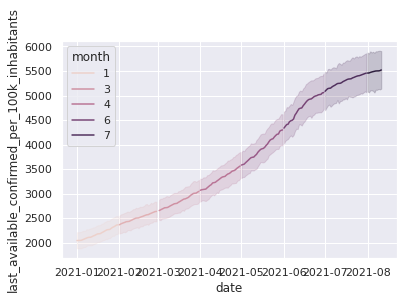

In [73]:
# Plot the responses for different events and regions
sns.lineplot(x="date", y="last_available_confirmed_per_100k_inhabitants",
             hue="month", 
             data=pe_dataset)

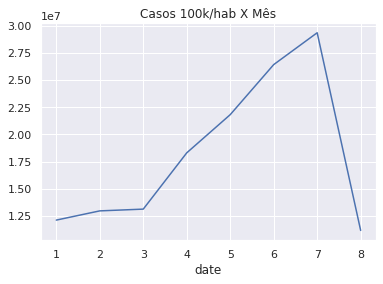

In [84]:
agg_month = pe_dataset.groupby(pe_dataset["date"].dt.month)["last_available_confirmed_per_100k_inhabitants"].sum()

agg_month.plot(x='month', y='last_available_confirmed_per_100k_inhabitants', title='Casos 100k/hab X Mês')